In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import files
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from google.colab import files
import warnings

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Classification Project/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Classification Project/test.csv')
id = test['Unnamed: 0']
target = df['completion_status']
df=df.drop(['Unnamed: 0', 'id', 'completion_status'], axis=1)
test = test.drop(['Unnamed: 0', 'id'], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   owner_1_score                             1516 non-null   float64
 1   RATE_owner_1                              1510 non-null   object 
 2   CAP_AMOUNT_owner_1                        1506 non-null   float64
 3   PERCENT_OWN_owner_1                       1524 non-null   float64
 4   owner_2_score                             185 non-null    float64
 5   RATE_owner_2                              185 non-null    object 
 6   CAP_AMOUNT_owner_2                        174 non-null    float64
 7   PERCENT_OWN_owner_2                       224 non-null    float64
 8   owner_3_score                             7 non-null      float64
 9   RATE_owner_3                              7 non-null      object 
 10  CAP_AMOUNT_owner_3                  

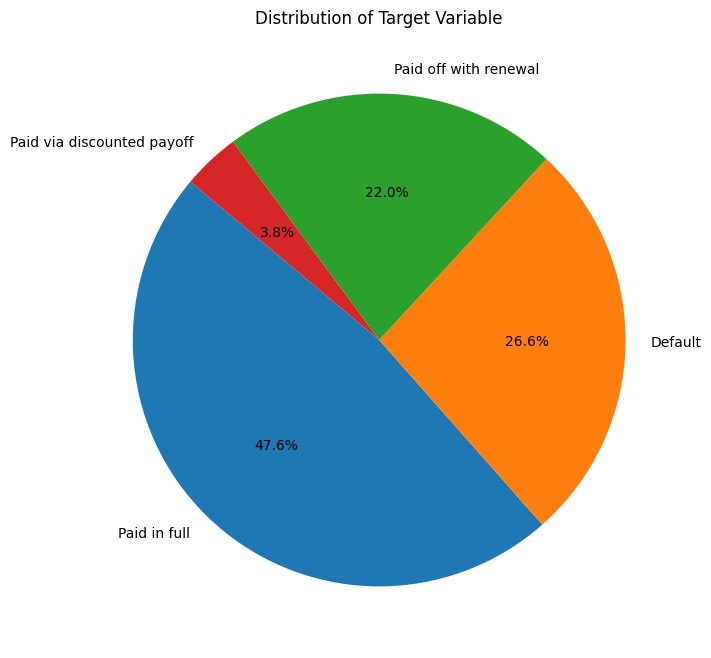

In [ ]:
#Checking if there's an imbalamce in the target
target_counts = target.value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
numerical = df.select_dtypes(include=(float,int))
categorical = df.select_dtypes(include=(object))

test_numerical = test.select_dtypes(include=(float,int))
test_categorical = test.select_dtypes(include=(object))

for column in categorical.columns:
  print(categorical[column].value_counts())

RATE_owner_1
A    910
B    324
C    210
D     62
R      4
Name: count, dtype: int64
RATE_owner_2
A    121
C     26
D     14
B     13
R     11
Name: count, dtype: int64
RATE_owner_3
A    4
D    3
Name: count, dtype: int64
RATE_ID_FOR_years_in_business
A    1314
B     160
C      36
D      15
Name: count, dtype: int64
RATE_ID_FOR_fsr
D    9
A    6
Name: count, dtype: int64
location
Verified    956
Home        526
Unknown      35
BRICK        10
Name: count, dtype: int64
RATE_ID_FOR_location
A    1473
Name: count, dtype: int64
funded_last_30
N    1532
Y       5
Name: count, dtype: int64
RATE_ID_FOR_funded_last_30
D    5
Name: count, dtype: int64
RATE_ID_FOR_judgement_lien_percent
A    1518
D       9
B       6
C       4
Name: count, dtype: int64
RATE_ID_FOR_judgement_lien_amount
A    1536
D       1
Name: count, dtype: int64
RATE_ID_FOR_num_negative_days
A    1296
C     115
B      84
D      40
Name: count, dtype: int64
RATE_ID_FOR_num_deposits
A    818
R    607
C     94
B     18
Name: count,

In [ ]:
df.shape

(1537, 53)

In [ ]:
df.describe()

,owner_1_score,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,owner_3_score,CAP_AMOUNT_owner_3,PERCENT_OWN_owner_3,years_in_business,...,INPUT_VALUE_ID_FOR_tax_lien_percent,INPUT_VALUE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id
count,1516.000000,1506.000000,1524.000000,185.000000,174.000000,224.000000,7.000000,7.000000,33.000000,1525.000000,...,1537.000000,1528.000000,1525.000000,1.531000e+03,0.0,0.0,1510.000000,1457.000000,1491.000000,1537.000000
mean,639.666227,117031.872510,92.826509,1118.902703,117011.494253,35.324107,623.857143,85714.285714,7.572727,19.836656,...,0.047681,0.014398,0.714754,9.107680e+04,NaN,NaN,656.448344,116420.727522,97.400469,3943.005205
std,436.564984,47147.062423,39.239430,1988.694684,53867.530571,18.474337,224.808384,80178.372574,16.709134,138.078268,...,1.388539,0.176711,0.779881,1.732702e+05,NaN,NaN,570.443661,47681.543573,37.275931,2172.407533
min,0.000000,0.000000,0.000000,432.000000,0.000000,0.000000,376.000000,0.000000,0.000000,0.030000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,88.000000
25%,573.000000,100000.000000,100.000000,582.000000,100000.000000,20.000000,387.500000,0.000000,0.000000,3.080000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,568.000000,100000.000000,100.000000,2234.000000
50%,620.000000,150000.000000,100.000000,647.000000,150000.000000,49.000000,804.000000,150000.000000,0.000000,5.850000,...,0.000000,0.000000,1.000000,4.735876e+04,NaN,NaN,621.000000,150000.000000,100.000000,4171.000000
75%,664.000000,150000.000000,100.000000,680.000000,150000.000000,50.000000,804.000000,150000.000000,0.000000,11.390000,...,0.000000,0.000000,1.000000,1.051457e+05,NaN,NaN,665.000000,150000.000000,100.000000,5428.000000
max,9002.000000,150000.000000,1000.000000,9002.000000,150000.000000,64.000000,804.000000,150000.000000,50.000000,1805.400000,...,53.968000,3.000000,4.000000,2.291481e+06,NaN,NaN,9002.000000,150000.000000,1000.000000,9062.000000


In [ ]:
categorical.isnull().sum() / categorical.shape[0]

RATE_owner_1                          0.017567
RATE_owner_2                          0.879636
RATE_owner_3                          0.995446
RATE_ID_FOR_years_in_business         0.007807
RATE_ID_FOR_fsr                       0.990241
location                              0.006506
RATE_ID_FOR_location                  0.041640
funded_last_30                        0.000000
RATE_ID_FOR_funded_last_30            0.996747
RATE_ID_FOR_judgement_lien_percent    0.000000
RATE_ID_FOR_judgement_lien_amount     0.000000
RATE_ID_FOR_num_negative_days         0.001301
RATE_ID_FOR_num_deposits              0.000000
RATE_ID_FOR_monthly_gross             0.000000
RATE_ID_FOR_average_ledger            0.000000
RATE_ID_FOR_fc_margin                 0.000000
RATE_ID_FOR_tax_lien_amount           0.000000
RATE_ID_FOR_tax_lien_percent          0.000000
RATE_ID_FOR_tax_lien_count            0.005856
RATE_ID_FOR_current_position          0.007807
INPUT_VALUE_ID_FOR_industry_type      0.015615
RATE_owner_4 

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
categorical = pd.DataFrame(imputer.fit_transform(categorical), columns=categorical.columns)
test_categorical = pd.DataFrame(imputer.transform(test_categorical), columns=test_categorical.columns)
categorical.isnull().sum()

RATE_owner_1                          0
RATE_owner_2                          0
RATE_owner_3                          0
RATE_ID_FOR_years_in_business         0
RATE_ID_FOR_fsr                       0
location                              0
RATE_ID_FOR_location                  0
funded_last_30                        0
RATE_ID_FOR_funded_last_30            0
RATE_ID_FOR_judgement_lien_percent    0
RATE_ID_FOR_judgement_lien_amount     0
RATE_ID_FOR_num_negative_days         0
RATE_ID_FOR_num_deposits              0
RATE_ID_FOR_monthly_gross             0
RATE_ID_FOR_average_ledger            0
RATE_ID_FOR_fc_margin                 0
RATE_ID_FOR_tax_lien_amount           0
RATE_ID_FOR_tax_lien_percent          0
RATE_ID_FOR_tax_lien_count            0
RATE_ID_FOR_current_position          0
INPUT_VALUE_ID_FOR_industry_type      0
RATE_owner_4                          0
dtype: int64

In [ ]:
labelencoder =LabelEncoder()
for column in categorical.columns:
  categorical[column] =labelencoder.fit_transform(categorical[column])
  test_categorical[column] = labelencoder.transform(test_categorical[column])
target = labelencoder.fit_transform(target)

In [ ]:
numerical.isnull().sum() / numerical.shape[0]

owner_1_score                               0.013663
CAP_AMOUNT_owner_1                          0.020169
PERCENT_OWN_owner_1                         0.008458
owner_2_score                               0.879636
CAP_AMOUNT_owner_2                          0.886792
PERCENT_OWN_owner_2                         0.854262
owner_3_score                               0.995446
CAP_AMOUNT_owner_3                          0.995446
PERCENT_OWN_owner_3                         0.978530
years_in_business                           0.007807
fsr                                         0.271308
judgement_lien_percent                      0.000000
INPUT_VALUE_ID_FOR_judgement_lien_amount    0.000000
INPUT_VALUE_ID_FOR_judgement_lien_time      1.000000
RATE_ID_FOR_judgement_lien_time             1.000000
INPUT_VALUE_ID_FOR_num_negative_days        0.000000
INPUT_VALUE_ID_FOR_num_deposits             0.000000
INPUT_VALUE_ID_FOR_monthly_gross            0.000000
INPUT_VALUE_ID_FOR_average_ledger           0.

In [ ]:
drop2 = ['INPUT_VALUE_ID_FOR_judgement_lien_time', 'RATE_ID_FOR_judgement_lien_time', 'RATE_ID_FOR_avg_net_deposits', 'RATE_ID_FOR_industry_type']
numerical =numerical.drop(drop2, axis=1)
test_numerical = test_numerical.drop(drop2, axis=1)

In [ ]:
imputer =SimpleImputer(missing_values=np.nan, strategy= 'mean')
numerical = pd.DataFrame(imputer.fit_transform(numerical), columns = numerical.columns)
test_numerical = pd.DataFrame(imputer.transform(test_numerical), columns = test_numerical.columns)
numerical.isnull().sum() / numerical.shape[0]

owner_1_score                               0.0
CAP_AMOUNT_owner_1                          0.0
PERCENT_OWN_owner_1                         0.0
owner_2_score                               0.0
CAP_AMOUNT_owner_2                          0.0
PERCENT_OWN_owner_2                         0.0
owner_3_score                               0.0
CAP_AMOUNT_owner_3                          0.0
PERCENT_OWN_owner_3                         0.0
years_in_business                           0.0
fsr                                         0.0
judgement_lien_percent                      0.0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0.0
INPUT_VALUE_ID_FOR_num_negative_days        0.0
INPUT_VALUE_ID_FOR_num_deposits             0.0
INPUT_VALUE_ID_FOR_monthly_gross            0.0
INPUT_VALUE_ID_FOR_average_ledger           0.0
INPUT_VALUE_ID_FOR_fc_margin                0.0
INPUT_VALUE_ID_FOR_tax_lien_amount          0.0
INPUT_VALUE_ID_FOR_tax_lien_percent         0.0
INPUT_VALUE_ID_FOR_tax_lien_count       

In [ ]:
features=pd.concat([numerical, categorical], axis=1)
test=pd.concat([test_numerical, test_categorical], axis=1)

In [ ]:
# #Removing Duplicate Rows
# duplicate_rows_indices = features[features.duplicated()].index
# features.drop(index = duplicate_rows_indices, inplace=True)
# target.drop(index = duplicate_rows_indices, inplace=True)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=42)
scaler=StandardScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_val_scaled = pd.DataFrame(scaler.transform(x_val), columns = x_val.columns)
test_scaled=pd.DataFrame(scaler.transform(test), columns = test.columns)


In [ ]:
#Applying SMOTE to solve class imbalance
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train_scaled, y_train)

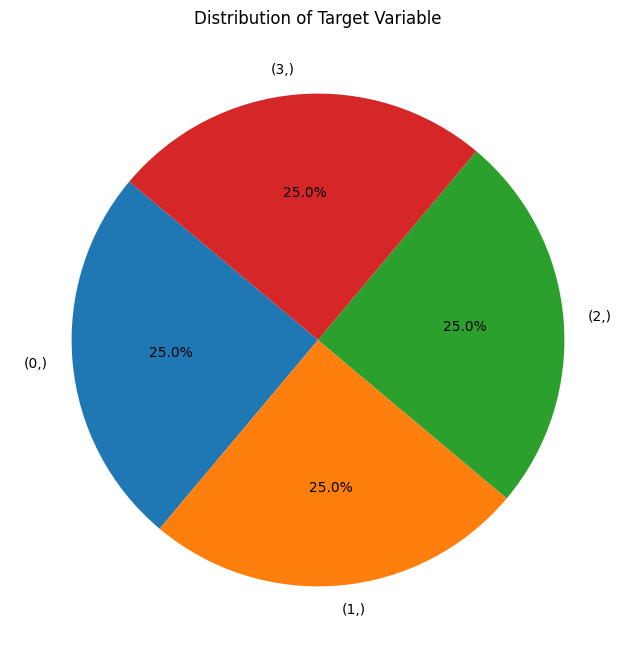

In [ ]:
#Checking the results of applying SMOTE
target_counts = pd.DataFrame(y_resampled).value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
#Recursive Feature Elimination
#Determine the model that the rfe will use to estimate the best number of features
estimator = DecisionTreeClassifier()

selector = RFECV(estimator, cv=5)
selector = selector.fit(x_resampled, y_resampled)
x_resampled = pd.DataFrame(x_resampled, columns=x_resampled.columns)

print(f'Optimal number of features = {selector.n_features_}')

best_features = selector.support_
x_selected = x_resampled.columns[best_features]
print(f'Best Features: {x_selected}')

x_rfe_train = x_resampled.loc[:, selector.support_]
x_rfe_val = x_val_scaled.loc[:, selector.support_]
test_rfe = test_scaled.loc[:, selector.support_]

Optimal number of features = 4
Best Features: Index(['owner_1_score', 'years_in_business', 'fsr',
       'deal_application_thread_id'],
      dtype='object')


In [ ]:
def predict(model, param_grid):
  gridsearch = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy')
  gridsearch.fit(x_rfe_train, y_resampled)
  y_val_pred = gridsearch.predict(x_rfe_val)
  accuracy = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val, y_val_pred, average = 'macro')
  recall = recall_score(y_val, y_val_pred, average = 'macro')
  f1score = f1_score(y_val, y_val_pred, average = 'macro')
  print(f' Performance of {model}\n\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1-score: {f1score}')
  print('---------------------------------------------------------------------------------------------------------------------')


In [ ]:
#Decision Tree
tree = DecisionTreeClassifier(criterion = 'entropy')

param_grid_dt = {
    'max_depth' : [10, 20, 30, 40, 50],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 2, 5, 10]
}

gridsearch1 = GridSearchCV(estimator = tree, param_grid=param_grid1, cv=5, scoring = 'accuracy')



gridsearch1.fit(x_rfe_train, y_resampled)
y_val_pred = gridsearch1.predict(x_rfe_val)
accuracy = accuracy_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Best Parameters: {gridsearch1.best_params_}')
print(f'Best Score: {gridsearch1.best_score_}')

Accuracy: 0.9415584415584416
Best Parameters: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8842857142857143


In [ ]:
predict(tree, param_grid1)

 Performance of DecisionTreeClassifier(criterion='entropy')

 Accuracy: 0.9393939393939394
 Precision: 0.937575857883703
 Recall: 0.9385051341573081
 F1-score: 0.9374908283707695
---------------------------------------------------------------------------------------------------------------------


In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors' : [3, 5, 7, 9],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

gridsearch3 = GridSearchCV(estimator = knn, param_grid = param_grid, cv=5, scoring='accuracy')

gridsearch3.fit(x_rfe_train, y_resampled)

y_pred_val = gridsearch3.predict(x_rfe_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average = 'macro')
f1score = f1_score(y_val, y_pred_val, average = 'macro')

cm = confusion_matrix(y_val, y_pred_val)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1score} \n')

print(f'Best Parameters: {gridsearch3.best_params_}')
print(f'Best Score: {gridsearch3.best_score_}')

Accuracy: 0.935064935064935
Precision: 0.9232512157991882
Recall: 0.9387539996235648
F1-Score: 0.9301648602277122 

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Score: 0.8766666666666667


In [ ]:
#SVM
svm = SVC(kernel = 'poly', degree = 3, coef0 = 1)

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'gamma' : ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

gridsearch2 = GridSearchCV(estimator = svm, param_grid=param_grid, cv = 5, scoring = 'accuracy')
gridsearch2.fit(x_rfe_train, y_resampled)
y_pred_val = gridsearch2.predict(x_rfe_val)

accuracy = accuracy_score(y_val, y_pred_val)

print(f'Accuracy: {accuracy}')
print(f'Best Parameters: {gridsearch2.best_params_}')
# print(f'Best Score: {gridsearch2.best_score_}')



In [ ]:
y_test_pred = gridsearch1.predict(test_rfe)
y_test_pred = labelencoder.inverse_transform(y_test_pred)
id = id.rename('id')
predictions =pd.concat([id,pd.DataFrame(y_test_pred)], axis=1, ignore_index=False)
predictions.to_csv('predictions.csv', index=False)
files.download('predictions.csv')
y_test_pred=pd.DataFrame(y_test_pred)
y_test_pred.value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Paid in full                  122
Default                        91
Paid off with renewal          50
Paid via discounted payoff     10
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

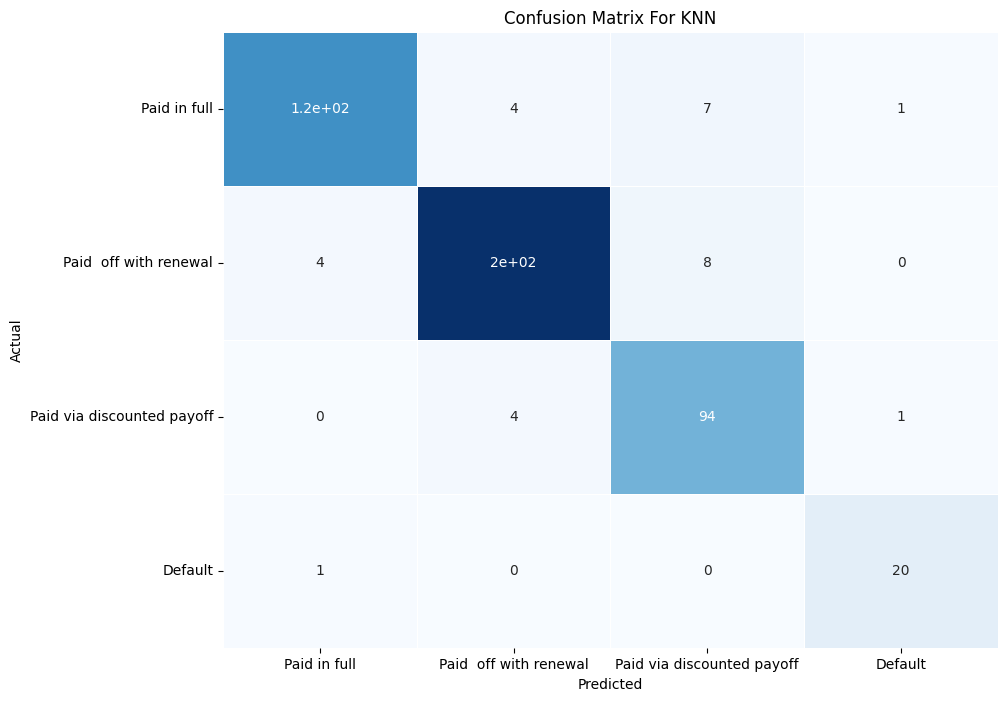

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Paid in full', 'Paid  off with renewal', 'Paid via discounted payoff', 'Default'],
            yticklabels=['Paid in full', 'Paid  off with renewal', 'Paid via discounted payoff', 'Default'], linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For KNN')
plt.savefig('Confusion Matrix For KNN.png')
files.download('Confusion Matrix For KNN.png')
plt.show()

In [ ]:
mlp = MLPClassifier(random_state = 42)

warnings.filterwarnings('ignore')

param_grid = {
    'solver' : ['adam', 'sgd'],
    'activation' : ['relu', 'tanh'],
    'alpha' : [0.0001, 0.001, 0.01]
}

gridsearch4 = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 5, scoring = 'accuracy')

gridsearch4.fit(x_rfe_train, y_resampled)

y_pred_val = gridsearch4.predict(x_rfe_val)
accuracy = accuracy_score(y_val, y_pred_val)

print(f'Accuracy: {accuracy}')
print(f'Best Parameters: {gridsearch4.best_params_}')
print(f'Best Score: {gridsearch4.best_score_}')


Accuracy: 0.47186147186147187
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'solver': 'adam'}
Best Score: 0.5633333333333332


In [ ]:
logistic = LogisticRegression()

param_grid = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'fit_intercept' : [True, False],
    'max_iter' : [100, 200, 300]
}

gridsearch5 = GridSearchCV(estimator = logistic, param_grid = param_grid, cv=5, scoring = 'accuracy')

gridsearch5.fit(x_rfe_train, y_resampled)

best_model =gridsearch5.best_estimator_

y_pred_val = best_model.predict(x_rfe_val)

accuracy = accuracy_score(y_val, y_pred_val)
print(f'Accuracy: {accuracy}')
print(f'Best Parameters: {gridsearch5.best_params_}')
print(f'Best Score: {gridsearch5.best_score_}')

Accuracy: 0.20562770562770563
Best Parameters: {'C': 10, 'fit_intercept': True, 'max_iter': 100}
Best Score: 0.34523809523809523
